# Kr NEW Compare KrMap - ICAROS Map - Apply to bb0nu

J. A Hernando, C. Herves

May 2022

In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
from   scipy             import stats
from   scipy             import optimize

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.profile      as prof

import nana.kr.krana    as krana
import nana.kr.icaros   as icaros

#import nana.bclouds.bclouds      as bc
#import hipy.hfit         as hfit
from invisible_cities.io.dst_io import load_dst, load_dsts
#import invisible_cities.io.dst_io as dio

In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Thu May 12 20:44:34 2022


In [5]:
#import os
import re
import glob

from collections import namedtuple

## Access Data

In [6]:
path = '/Users/hernando/work/investigacion/NEXT/data/NEXT100/'

In [8]:
run  = 'MC00'
mapfilename = path + 'Kr/maps/map_NEXT100_' + str(run) + '.h5'

In [58]:
icaromap = icaros.get_map(mapfilename)
icarocor = icaros.get_correction(icaromap)

In [10]:
krmap  = krana.krmap_read('krmap' , 'krmap_NEXT100_'+str(run)+'.h5', 'KrMap')
xyprof = krana.krmap_read('xyprof', 'krmap_NEXT100_'+str(run)+'.h5', 'Profile')

In [13]:
from os import listdir

run = 'bb0nu/'
filenames = listdir(path+str(run))
filenames.sort()
print(len(filenames), filenames[0], filenames[-1])
filenames = [path + str(run) + '/' + ifile for ifile in filenames]

chits = load_dsts(filenames, "RECO", "Events")
#kdst = load_dsts(filenames, "DST", "Events")

200 penthesilea_100_0nubb.h5 penthesilea_9_0nubb.h5


In [20]:
vdrift = 0.84

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,9900,9.900920e+09,0,-197.773586,-346.646757,0,0.0,0.0,0.0,0.0,495.537000,-999999.0,0.792605,-1.0,-1.0,-1,-1.0
1,9900,9.900920e+09,0,-197.773586,-346.646757,0,0.0,0.0,0.0,0.0,496.255515,-999999.0,2.215652,-1.0,-1.0,-1,-1.0
2,9900,9.900920e+09,0,-197.773586,-346.646757,0,0.0,0.0,0.0,0.0,497.036820,-999999.0,15.603138,-1.0,-1.0,-1,-1.0
3,9900,9.900920e+09,0,-197.773586,-346.646757,0,0.0,0.0,0.0,0.0,497.753917,-999999.0,20.345182,-1.0,-1.0,-1,-1.0
4,9900,9.900920e+09,0,-197.773586,-346.646757,0,0.0,0.0,0.0,0.0,498.595912,-999999.0,63.427998,-1.0,-1.0,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10943596,898,8.980729e+08,0,314.814163,-271.350611,0,0.0,0.0,0.0,0.0,963.026610,-999999.0,118.190132,-1.0,-1.0,-1,-1.0
10943597,898,8.980729e+08,0,314.814163,-271.350611,0,0.0,0.0,0.0,0.0,963.895590,-999999.0,48.388229,-1.0,-1.0,-1,-1.0
10943598,898,8.980729e+08,0,314.814163,-271.350611,0,0.0,0.0,0.0,0.0,964.636050,-999999.0,24.086206,-1.0,-1.0,-1,-1.0
10943599,898,8.980729e+08,0,314.814163,-271.350611,0,0.0,0.0,0.0,0.0,965.436675,-999999.0,13.733202,-1.0,-1.0,-1,-1.0


In [29]:
chits = chits.rename(columns = {'E' : 'energy', 'X' : 'x', 'Y' : 'y', 'Z' : 'z'})
chits = chits[['event', 'time', 'energy', 'x', 'y', 'z']]

In [32]:
chits['dtime'] = chits.z/vdrift
chits['r']     = np.sqrt(chits.x**2 + chits.y**2)

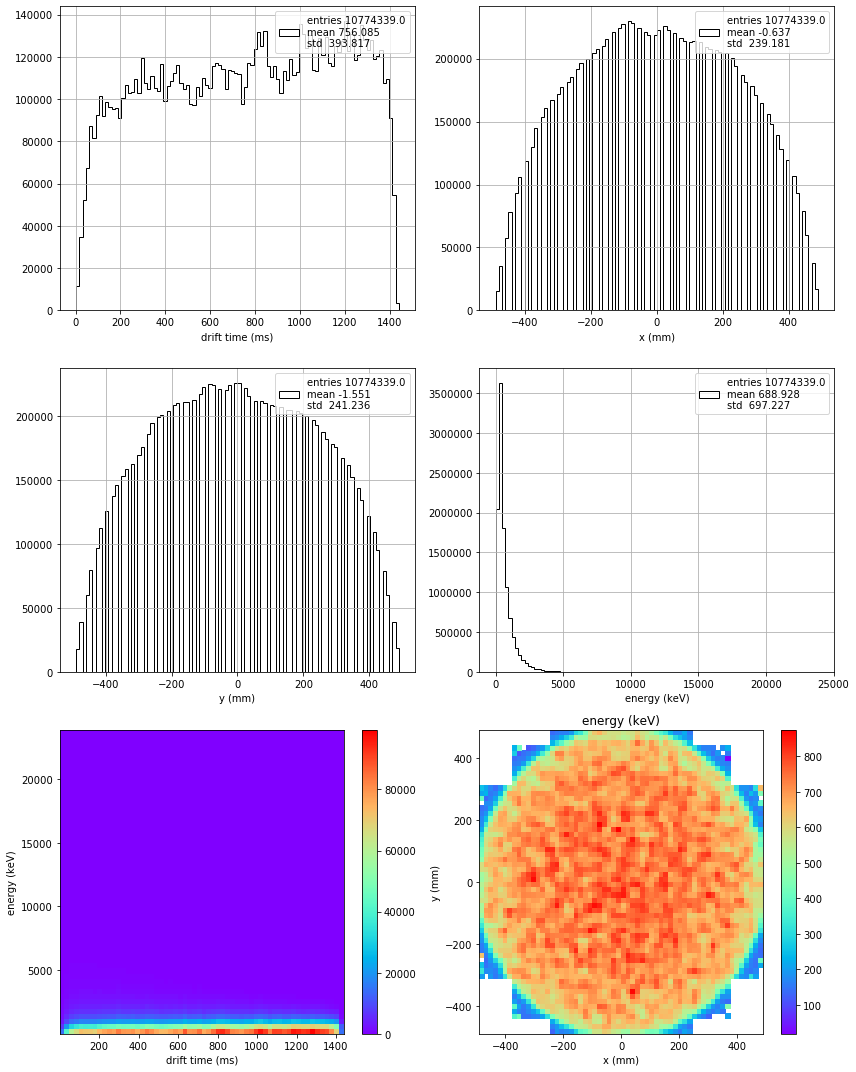

In [34]:
krana.plot_data(chits[chits.x != 0.], 60)

In [37]:
dfevt   = {}
dfevt['x']       = chits.groupby('event')['x'].mean()
dfevt['y']       = chits.groupby('event')['y'].mean()
dfevt['z']       = chits.groupby('event')['z'].mean()
dfevt['energy']  = chits.groupby('event')['energy'].sum()
dfevt['dtime']   = chits.groupby('event')['dtime'].mean()
dfevt['event']   = chits.groupby('event')['event'].max()
dfevt['time']    = chits.groupby('event')['time'].mean
dfevt   = pd.DataFrame(dfevt)

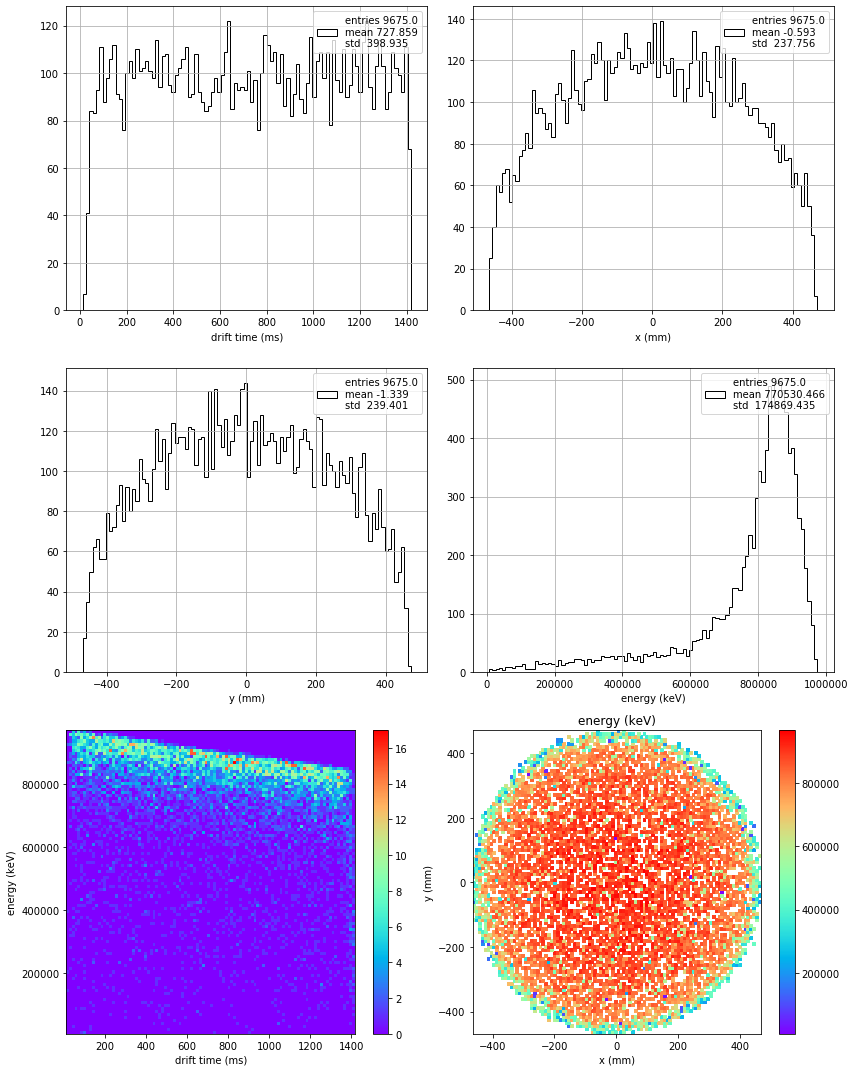

In [38]:
krana.plot_data(dfevt, 100);

In [53]:
coors = (chits.x, chits.y)
dt    = chits.dtime
dt    = chits.z
ene   = chits.energy
krene = krana.krmap_scale(coors, dt, ene, krmap, 41.5)

In [42]:
chits['krenergy'] = krene[0]
dfevt['krenergy'] = chits.groupby('event')['krenergy'].sum()

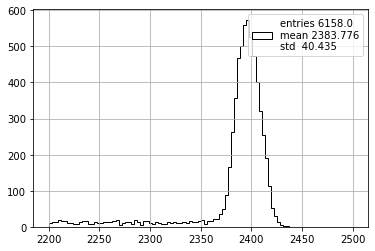

In [44]:
pltext.hist(dfevt['krenergy'], 100, (2200, 2500));

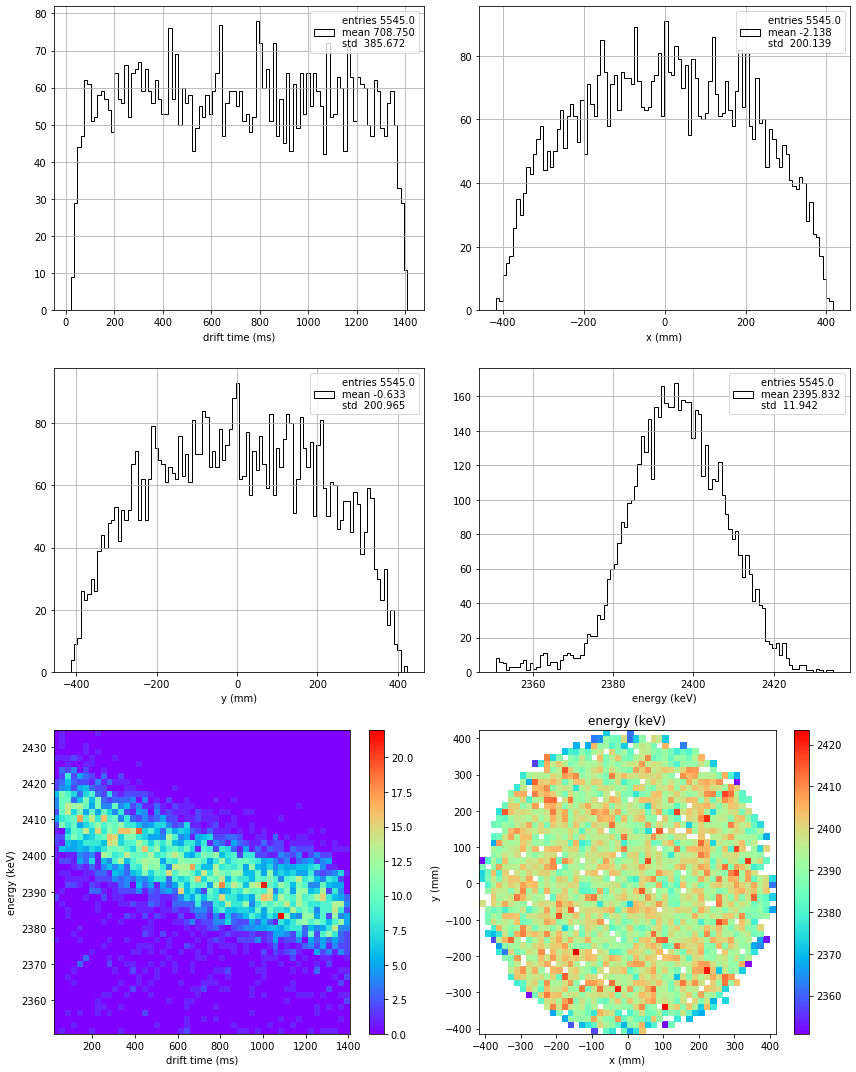

In [52]:
xdf = pd.DataFrame(dfevt)
xdf['energy'] = xdf.krenergy

xsel = ut.in_range(xdf.energy, (2350, 2500))
krana.plot_data(xdf[xsel], 50);

## ICARO

In [62]:
x    = chits.x.values 
y    = chits.y.values
z    = chits.z.values
time = chits.time.values 
ene  = chits.energy.values
enec = 1e3 * ene * icarocor(x, y, z, time)
chits['icenergy'] = enec

In [63]:
dfevt['icenergy'] = chits.groupby('event')['icenergy'].sum()

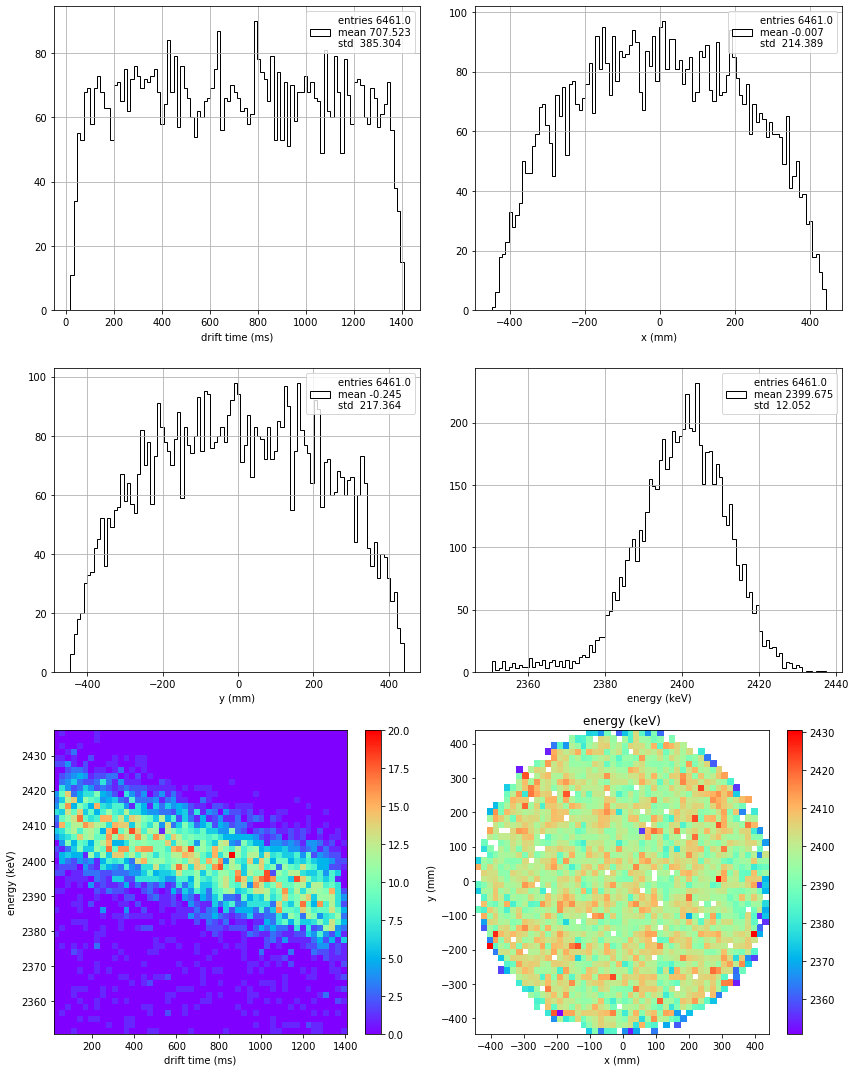

In [64]:
xdf = pd.DataFrame(dfevt)
xdf['energy'] = xdf.icenergy

xsel = ut.in_range(xdf.energy, (2350, 2500))
krana.plot_data(xdf[xsel], 50);